In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.callbacks import *

In [3]:
torch.cuda.is_available()

True

In [4]:
get_transforms?

In [5]:
tfms = get_transforms(do_flip=True,flip_vert=False,max_rotate=10.0,max_zoom=1.1,max_lighting=0.2,max_warp=0.2,p_affine=0.75,p_lighting=0.75)


In [6]:
np.random.seed(42)


In [7]:
# from pathlib import Path
# path = Path("train/")

# print(path)
# for c in data.classes:
#     print(c)
#     verify_images(path/c, delete=True)

In [8]:
src = (ImageList.from_folder(path='train').split_by_rand_pct(0.2).label_from_folder())

In [9]:
src

LabelLists;

Train: LabelList (65934 items)
x: ImageList
Image (3, 500, 375),Image (3, 500, 375),Image (3, 500, 375),Image (3, 500, 375),Image (3, 375, 500)
y: CategoryList
class-1059,class-1059,class-1059,class-1059,class-1059
Path: train;

Valid: LabelList (16483 items)
x: ImageList
Image (3, 533, 800),Image (3, 375, 500),Image (3, 2000, 1500),Image (3, 480, 358),Image (3, 500, 375)
y: CategoryList
class-448,class-697,class-204,class-540,class-854
Path: train;

Test: None

In [10]:
data = src.transform(tfms,size=64).databunch(bs=32).normalize(imagenet_stats)

In [11]:
data.c

45

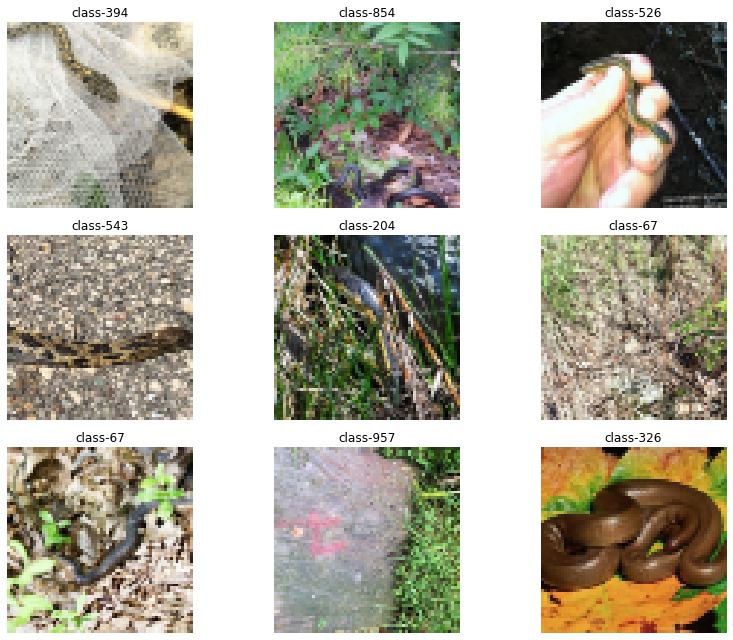

In [12]:
data.show_batch(rows=3, figsize=(12,9))

In [13]:
import torch
from efficientnet_pytorch import EfficientNet


In [14]:
ef_model_new = EfficientNet.from_pretrained('efficientnet-b3', num_classes=23)

AttributeError: 'NoneType' object has no attribute 'missing_keys'

In [ ]:
ef_model

In [ ]:
ef_learn = Learner(
    data,
    ef_model,
    metrics=[error_rate, accuracy, FBeta(beta=1)],
)

In [ ]:
ef_learn.freeze_to(-1)


In [ ]:
ef_learn.lr_find()


In [ ]:
ef_learn.recorder.plot()

In [ ]:
lr = 1e-2

In [ ]:
ef_learn.fit_one_cycle(2,max_lr=lr)

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)


In [ ]:
losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

In [ ]:
interp.plot_top_losses(9, figsize=(15,11))


In [ ]:
interp.plot_confusion_matrix(figsize=(20,20), dpi=60)


In [ ]:
interp.most_confused(min_val=2)
